In [ ]:
# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading and preprocessing data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Building a deeper model with different activation functions
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training model
model.fit(x_train, y_train, epochs=7, validation_split=0.1)

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8604 - loss: 0.4703 - val_accuracy: 0.9608 - val_loss: 0.1318
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9522 - loss: 0.1559 - val_accuracy: 0.9693 - val_loss: 0.1021
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9647 - loss: 0.1148 - val_accuracy: 0.9735 - val_loss: 0.0924
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9696 - loss: 0.0945 - val_accuracy: 0.9763 - val_loss: 0.0833
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9754 - loss: 0.0785 - val_accuracy: 0.9723 - val_loss: 0.0914
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0740 - val_accuracy: 0.9765 - val_loss: 0.0780
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9796 - loss: 0.0611 - val_accuracy: 0.9772 - val_loss: 0.0747


In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.0989
Test accuracy: 0.974399983882904


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


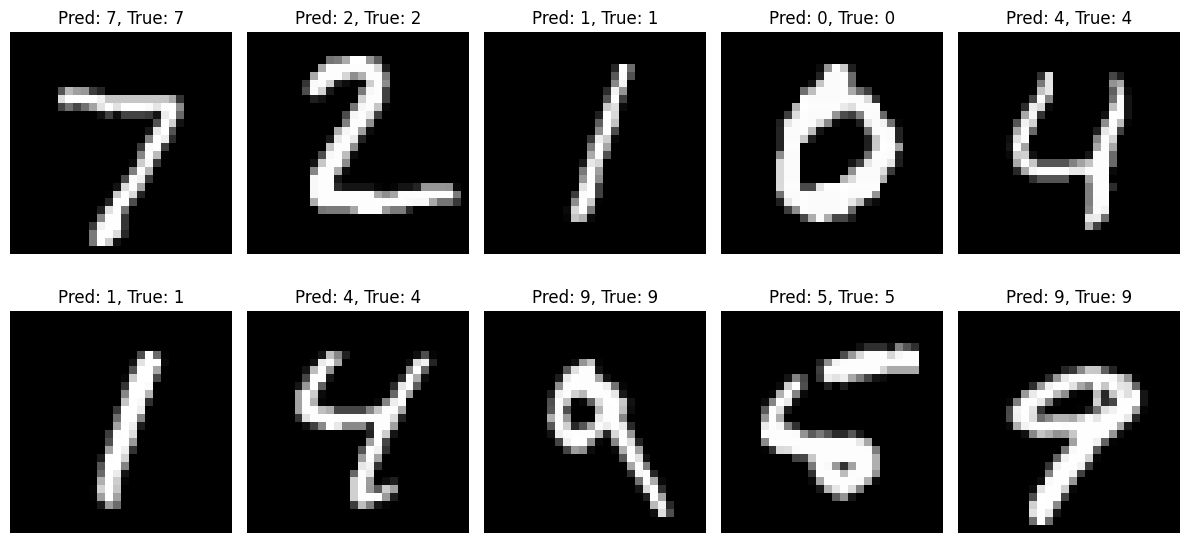

In [ ]:
# Visualizing first 10 predictions from test set
preds = model.predict(x_test[:10])
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i], cmap='gray')
    pred_label = np.argmax(preds[i])
    true_label = y_test[i]
    ax.set_title(f'Pred: {pred_label}, True: {true_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()